In [4]:
#determine how class, gender, and age affect survival rates for Titanic passengers

#import libraries and data file

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data_file = pd.read_csv('titanic_data.csv')

print(data_file.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [12]:
#categorize age

def convert_age(age):
    if age <= 3:
        return 'infant'
    elif age <= 12:
        return 'child'
    elif age <= 17:
        return 'teenager'
    elif age <= 60:
        return 'adult'
    else:
        return 'senior'

data_file['age_category'] = data_file['Age'].apply(convert_age)

In [11]:
#check average survivability by class, gender and age

group_by_age_category = data_file.groupby(['Pclass','Sex','age_category'])['Survived'].mean()
print(group_by_age_category)

Pclass  Sex     age_category
1       female  adult           0.973333
                infant          0.000000
                senior          1.000000
                teenager        1.000000
        male    adult           0.411765
                child           1.000000
                infant          1.000000
                senior          0.181818
                teenager        1.000000
2       female  adult           0.903226
                child           1.000000
                infant          1.000000
                senior          1.000000
                teenager        1.000000
        male    adult           0.058824
                child           1.000000
                infant          1.000000
                senior          0.250000
                teenager        0.000000
3       female  adult           0.409091
                child           0.428571
                infant          0.555556
                senior          0.604651
                teenager    

Age
0.42     1.000000
0.67     1.000000
0.75     1.000000
0.83     1.000000
0.92     1.000000
1.00     0.714286
2.00     0.300000
3.00     0.833333
4.00     0.700000
5.00     1.000000
6.00     0.666667
7.00     0.333333
8.00     0.500000
9.00     0.250000
10.00    0.000000
11.00    0.250000
12.00    1.000000
13.00    1.000000
14.00    0.500000
14.50    0.000000
15.00    0.800000
16.00    0.352941
17.00    0.461538
18.00    0.346154
19.00    0.360000
20.00    0.200000
20.50    0.000000
21.00    0.208333
22.00    0.407407
23.00    0.333333
           ...   
44.00    0.333333
45.00    0.416667
45.50    0.000000
46.00    0.000000
47.00    0.111111
48.00    0.666667
49.00    0.666667
50.00    0.500000
51.00    0.285714
52.00    0.500000
53.00    1.000000
54.00    0.375000
55.00    0.500000
55.50    0.000000
56.00    0.500000
57.00    0.000000
58.00    0.600000
59.00    0.000000
60.00    0.500000
61.00    0.000000
62.00    0.500000
63.00    1.000000
64.00    0.000000
65.00    0.000000
66.00 

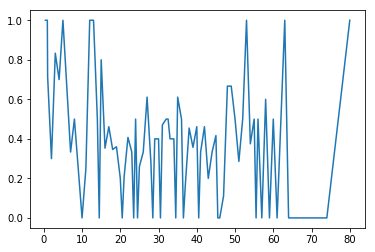

In [15]:
%matplotlib inline

group_by_age = data_file.groupby('Age')['Survived'].mean()
print(group_by_age)
plt.plot(group_by_age)